In [115]:
import pandas as pd

# dex_df = pd.read_csv("dex_dataset.csv", index_col=False)
# manif_df = pd.read_csv("processed_manifest.csv", index_col=False)

# df = pd.merge(manif_df, dex_df, left_on="id", right_on="id", how="inner").drop(["idx", "Unnamed: 0", "is_malicious_x"], axis=1)
# df.rename(columns={"is_malicious_y": "is_malicious"}, inplace=True)

# df.to_csv("dataset.csv", index=False)

df = pd.read_csv("dataset.csv")

In [116]:
from sklearn.model_selection import train_test_split

X = df.drop(["id", "is_malicious"], axis=1)
y = df["is_malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1079
           1       0.89      0.93      0.91      1077

    accuracy                           0.91      2156
   macro avg       0.91      0.91      0.91      2156
weighted avg       0.91      0.91      0.91      2156



In [120]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [121]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1023
           1       0.87      0.87      0.87      1133

    accuracy                           0.87      2156
   macro avg       0.87      0.87      0.87      2156
weighted avg       0.87      0.87      0.87      2156



In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [123]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1043
           1       0.89      0.91      0.90      1113

    accuracy                           0.90      2156
   macro avg       0.90      0.89      0.90      2156
weighted avg       0.90      0.90      0.90      2156



In [124]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

In [125]:
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1036
           1       0.92      0.92      0.92      1120

    accuracy                           0.92      2156
   macro avg       0.92      0.92      0.92      2156
weighted avg       0.92      0.92      0.92      2156



In [126]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

linear_svc_pred = linear_svc.predict(X_test)

/Users/kamil/miniconda3/envs/bigdata-project/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [127]:
print(classification_report(linear_svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1017
           1       0.90      0.89      0.90      1139

    accuracy                           0.89      2156
   macro avg       0.89      0.89      0.89      2156
weighted avg       0.89      0.89      0.89      2156



In [128]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [129]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1034
           1       0.90      0.91      0.91      1122

    accuracy                           0.90      2156
   macro avg       0.90      0.90      0.90      2156
weighted avg       0.90      0.90      0.90      2156



In [130]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

gauss_nb_pred = gauss_nb.predict(X_test)

In [131]:
print(classification_report(gauss_nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.11      0.97      0.20       119
           1       1.00      0.55      0.71      2037

    accuracy                           0.58      2156
   macro avg       0.56      0.76      0.46      2156
weighted avg       0.95      0.58      0.68      2156



In [132]:
# Calculate F1 score for all models

from sklearn.metrics import f1_score

rf_score = f1_score(rf_pred, y_test)
dt_score = f1_score(dt_pred, y_test)
knn_score = f1_score(knn_pred, y_test)
mlp_score = f1_score(mlp_pred, y_test)
linear_svc_score = f1_score(linear_svc_pred, y_test)
svc_score = f1_score(svc_pred, y_test)
gauss_nb_score = f1_score(gauss_nb_pred, y_test)

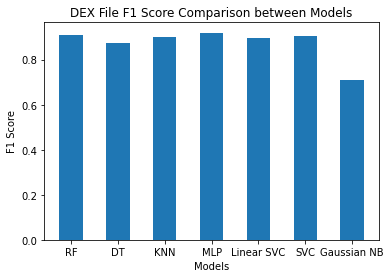

In [133]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

scores = [rf_score, dt_score, knn_score, mlp_score, linear_svc_score, svc_score, gauss_nb_score]
labels = ["RF", "DT", "KNN", "MLP", "Linear SVC", "SVC", "Gaussian NB"]

plt.bar(labels, scores, width=0.5)
plt.title("DEX File F1 Score Comparison between Models")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.show()

In [134]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

kf = KFold(n_splits=10, shuffle=True)

X = np.array(X)
y = np.array(y)

# f1_scores = []
# accuracy_scores = []
# recall_scores = []
# precision_scores = []
splits = []

ct = 0

for train_index, test_index in kf.split(X):
    ct += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    rf_pred = rf.predict(X_test)
    
    splits.append([accuracy_score(rf_pred, y_test), precision_score(rf_pred, y_test), recall_score(rf_pred, y_test), f1_score(rf_pred, y_test)])
    
#     f1_scores.append(f1_score(rf_pred, y_test))
#     accuracy_scores.append(accuracy_score(rf_pred, y_test))
#     recall_scores.append(recall_score(rf_pred, y_test))
#     precision_scores.append(precision_score(rf_pred, y_test))

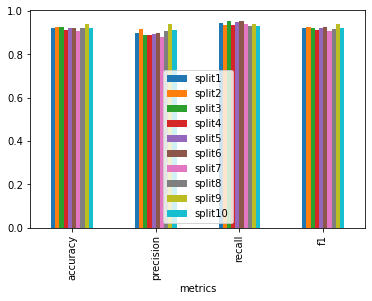

-0.007786068018371339


In [135]:
df = pd.DataFrame()
df["split1"] = splits[0]
df["split2"] = splits[1]
df["split3"] = splits[2]
df["split4"] = splits[3]
df["split5"] = splits[4]
df["split6"] = splits[5]
df["split7"] = splits[6]
df["split8"] = splits[7]
df["split9"] = splits[8]
df["split10"] = splits[9]

labels = ["accuracy", "precision", "recall", "f1"]
df["metrics"] = labels
cols = ["split1","split2","split3","split4","split5","split6","split7","split8","split9","split10"]
# df["model"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax = df.plot(x="metrics", y=cols, kind="bar")
# ax.set_ylim(0.87, 0.97)
plt.show()

print(df["split8"][2] - df["split9"][2])